In [2]:
import pandas as pd
# mdf = pd.read_csv('lmf_parsed.csv') # Load mortality file
# print( mdf.head() )
# gdf = pd.read_sas("DEMO.xpt", format="xport") # Load demographics file
# print( gdf.head() )
# df = gdf.merge(mdf, on="SEQN", how="inner") # Merge mortality and demographics on SEQN variable

In [3]:
df = pd.read_csv('merged_demo_mortality_caffeine.csv', index_col=False) # Load mortality file

df.head()


,SEQN,WTSSCAF2,WTSSCAF4,SSMU1,SSMU1LC,SSMU3,SSMU3LC,SSMU4,SSMU4LC,SSMU5,...,WTIREP50,WTIREP51,WTIREP52,ELIGSTAT,MORTSTAT,UCOD_LEADING,DIABETES,HYPERTEN,PERMTH_INT,PERMTH_EXM
0,3.0,155825.292773,81908.618596,48.2,5.397605e-79,7.3,5.397605e-79,4.11,5.397605e-79,15.80,...,44480.987235,45389.112766,43781.905637,2,NaN,NaN,NaN,NaN,NaN,NaN
1,10.0,83707.269908,43060.890405,224.0,5.397605e-79,43.6,5.397605e-79,17.40,5.397605e-79,30.70,...,21725.159674,21625.081706,22539.031224,1,1.0,1.0,0.0,0.0,231.0,231.0
2,15.0,382453.382288,179126.737330,257.0,5.397605e-79,29.6,5.397605e-79,31.70,5.397605e-79,80.70,...,110186.143135,112750.496899,110008.647960,1,0.0,NaN,NaN,NaN,231.0,231.0
3,16.0,59345.928641,37637.555198,12.5,5.397605e-79,11.9,5.397605e-79,0.11,5.397605e-79,0.19,...,12284.984275,12183.762035,12917.307420,1,1.0,2.0,0.0,0.0,63.0,62.0
4,20.0,53884.837911,32614.899512,44.3,5.397605e-79,1.2,5.397605e-79,3.03,5.397605e-79,21.30,...,16066.523195,15921.677395,15921.677395,1,0.0,NaN,NaN,NaN,245.0,244.0


In [4]:
# ELIGSTAT, MORTSTAT, PERMTH_INT, and RIDAGEEX
df[['ELIGSTAT', 'MORTSTAT', 'PERMTH_INT', 'RIDAGEEX']].head()

df[['ELIGSTAT', 'MORTSTAT', 'PERMTH_INT', 'RIDAGEEX']].describe()

,ELIGSTAT,MORTSTAT,PERMTH_INT,RIDAGEEX
count,2648.000000,1706.000000,1706.000000,2595.000000
mean,1.356495,0.297186,205.650059,405.627746
std,0.480629,0.457153,63.690242,268.712502
min,1.000000,0.000000,1.000000,72.000000
25%,1.000000,0.000000,212.250000,179.500000
50%,1.000000,0.000000,235.000000,321.000000
75%,2.000000,1.000000,242.000000,613.500000
max,3.000000,1.000000,249.000000,1018.000000


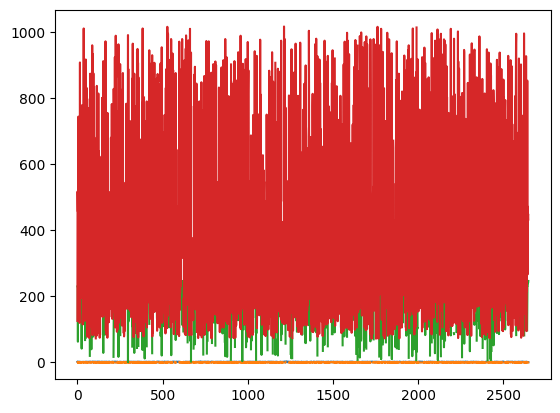

In [5]:
import matplotlib.pyplot as plt
plt.plot(df[['ELIGSTAT', 'MORTSTAT', 'PERMTH_INT', 'RIDAGEEX']])

In [10]:
# Skew and outliers
df[['ELIGSTAT', 'MORTSTAT', 'PERMTH_INT', 'RIDAGEEX']].describe()

,ELIGSTAT,MORTSTAT,PERMTH_INT,RIDAGEEX
count,2648.000000,1706.000000,1706.000000,2595.000000
mean,1.356495,0.297186,205.650059,405.627746
std,0.480629,0.457153,63.690242,268.712502
min,1.000000,0.000000,1.000000,72.000000
25%,1.000000,0.000000,212.250000,179.500000
50%,1.000000,0.000000,235.000000,321.000000
75%,2.000000,1.000000,242.000000,613.500000
max,3.000000,1.000000,249.000000,1018.000000


<Axes: xlabel='variable', ylabel='value'>

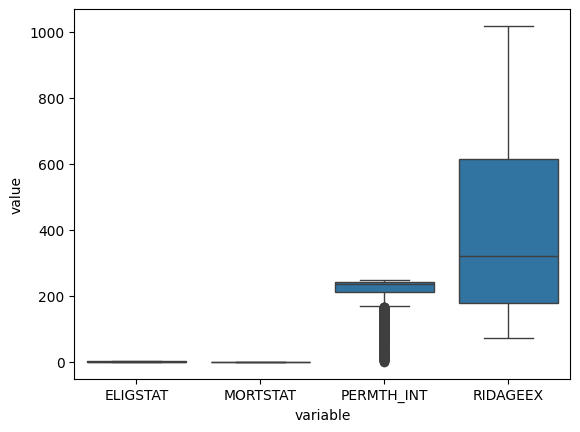

In [14]:
import seaborn as sns
cols = ['ELIGSTAT', 'MORTSTAT', 'PERMTH_INT', 'RIDAGEEX']

df_long = df[cols].melt(var_name="variable", value_name="value")

sns.boxplot(data=df_long, x="variable", y="value")

array([[<Axes: title={'center': 'ELIGSTAT'}>,
        <Axes: title={'center': 'MORTSTAT'}>],
       [<Axes: title={'center': 'PERMTH_INT'}>,
        <Axes: title={'center': 'RIDAGEEX'}>]], dtype=object)

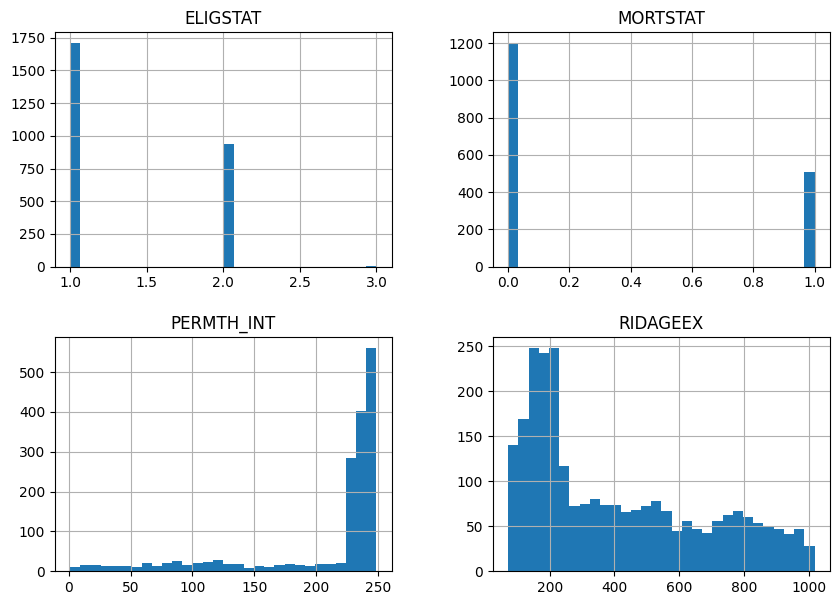

In [15]:
df[['ELIGSTAT', 'MORTSTAT', 'PERMTH_INT', 'RIDAGEEX']].hist(bins=30, figsize=(10,7))

array([[<Axes: title={'center': 'SSMX7'}>,
        <Axes: title={'center': 'SSMX5'}>,
        <Axes: title={'center': 'SSMX4'}>],
       [<Axes: title={'center': 'SSMX6'}>,
        <Axes: title={'center': 'SSMX1'}>,
        <Axes: title={'center': 'SSMX2'}>],
       [<Axes: title={'center': 'SSMX3'}>, <Axes: >, <Axes: >]],
      dtype=object)

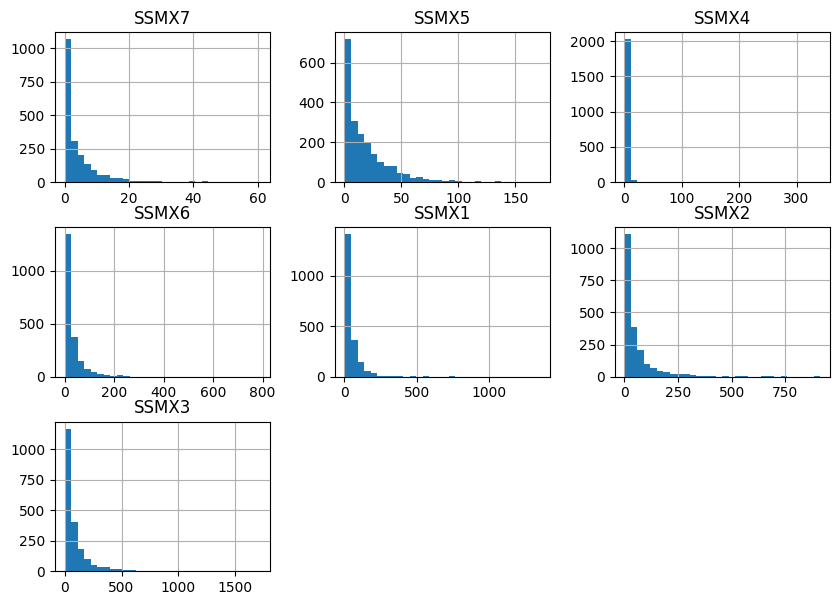

In [18]:
df[['SSMX7', 'SSMX5', 'SSMX4', 'SSMX6', 'SSMX1', 'SSMX2', 'SSMX3']].hist(bins=30, figsize=(10,7))

<Axes: xlabel='variable', ylabel='value'>

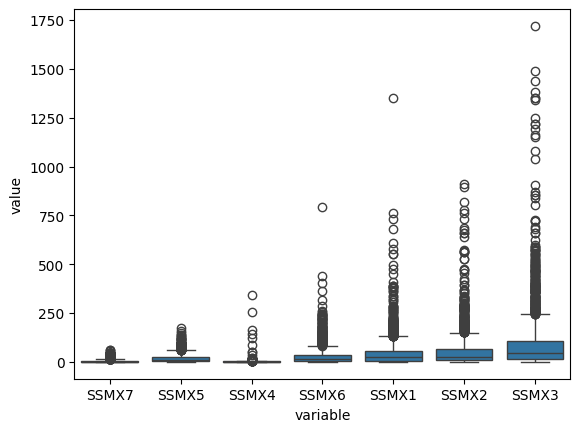

In [19]:
import seaborn as sns
coffee = ['SSMX7', 'SSMX5', 'SSMX4', 'SSMX6', 'SSMX1', 'SSMX2', 'SSMX3']

df_long = df[coffee].melt(var_name="variable", value_name="value")

sns.boxplot(data=df_long, x="variable", y="value")

In [ ]:
df[['SSMX7', 'SSMX5', 'SSMX4', 'SSMX6', 'SSMX1', 'SSMX2', 'SSMX3']]